In [15]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned data for analysis
filepath = '/Users/saiganeshreddykodekandla/Documents/projects/circuitTechnologies/CircuitTechNologiesFlipkart/CSV_files/flipkartCleanedDataFile.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Title,Brand,Price,Rating,Rating Count,Review Count,URL
0,Qubo Elite Lock by HERO GROUP 5-Way Unlocking ...,Qubo,13490.0,5.0,5.0,1.0,https://www.flipkart.com/qubo-elite-lock-hero-...
1,Qubo HERO GROUP 5-Way Unlocking Fingerprint Pi...,Qubo,15990.0,4.4,30.0,2.0,https://www.flipkart.com/qubo-hero-group-5-way...
2,Drumstone E-Lock Smart Keyless Entry | App Con...,Drumstone,3499.0,3.8,0.0,0.0,https://www.flipkart.com/drumstone-e-lock-smar...
3,V I R V 02 Smart Door Lock,V I R,15000.0,4.4,0.0,0.0,https://www.flipkart.com/v-r-02-smart-door-loc...
4,Worksaat Smart Solutions digital Smart Door Lock,Worksaat Smart Solutions,26999.0,4.3,0.0,0.0,https://www.flipkart.com/worksaat-smart-soluti...


In [4]:
# 1. Number of unique brands
num_brands = df['Brand'].nunique()
print("Number of unique brands:", num_brands)

Number of unique brands: 71


In [5]:
unique_brands = df['Brand'].unique()
print("Unique brands:", unique_brands)

Unique brands: ['Qubo' 'Drumstone' 'V I R' 'Worksaat Smart Solutions' 'Rhonnium' 'SPEEDY'
 'Elara' 'iPlug' 'Atomberg' 'Zunpulse' 'audiovan' 'BonKaso'
 'WildCard India' 'lumia' 'Yale' 'Elevea' 'Yabby Solutions' 'Technik'
 'ABEZBeSmart' 'LOCKOMATIC' 'iCare' 'amiciSmart' 'IIVAAs' 'Phlipton'
 'Godrej' 'SLYDER' 'tuchware' 'PLUS POINT' 'Nexmot' 'olsic' 'Robsync'
 'oob' 'ALLY VUE' 'DWIJA ENTERPRISE' 'Pooja Info Tauch' 'Denler'
 'DHARAM SHAKTI' 'Aayansh Collection' 'RS MegaMART' 'SMARTLOCK' 'jenix'
 'Dorset' 'OZONE' 'mariya' 'HomeMate' 'Tekninja' 'omismartlock'
 'hazon bazaar' 'Plantex' 'GOLENS' 'Luxafare' 'PocketShop' 'WeKonnect'
 'IBDA' 'PROBEROS' 'Linkify' 'lavna' 'AltroSmart' 'azLock' 'ZODIAQUE'
 'IFITech' 'TYAG' 'DEZIINE' 'PalD' 'ANALEX' 'HAVTON' 'SOLITY' 'SECUREYE'
 'Retekess' 'MRPlaywood' 'Yele']


In [6]:
# 2. Count of SKUs per brand
sku_count_per_brand = df['Brand'].value_counts()
print("SKU count per brand:")
print(sku_count_per_brand)

SKU count per brand:
Brand
Qubo        9
Godrej      8
tuchware    8
Denler      7
iPlug       6
           ..
Dorset      1
Zunpulse    1
mariya      1
HomeMate    1
Yele        1
Name: count, Length: 71, dtype: int64


In [7]:
# 3. Average Rating Count per brand (as a proxy for ranking)
average_rating_count_per_brand = df.groupby('Brand')['Rating Count'].mean().sort_values(ascending=False)
print("Average Rating Count per brand (as a proxy for ranking):")
print(average_rating_count_per_brand)

Average Rating Count per brand (as a proxy for ranking):
Brand
ZODIAQUE            137.0
azLock               53.0
TYAG                 36.0
Atomberg             34.0
DEZIINE              28.0
                    ...  
Pooja Info Tauch      0.0
ALLY VUE              0.0
RS MegaMART           0.0
Retekess              0.0
tuchware              0.0
Name: Rating Count, Length: 71, dtype: float64


In [8]:
# 4. Average rating per brand
average_rating_per_brand = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)
print("Average rating per brand:")
print(average_rating_per_brand)

Average rating per brand:
Brand
WeKonnect           4.700000
hazon bazaar        4.700000
Atomberg            4.700000
Godrej              4.575000
PLUS POINT          4.500000
                      ...   
Pooja Info Tauch    2.050000
HAVTON              1.466667
MRPlaywood          0.000000
SOLITY              0.000000
ABEZBeSmart         0.000000
Name: Rating, Length: 71, dtype: float64


In [9]:
# 5. Price distribution of SKUs
# Define price bands
bins = [0, 2999, 4999, 9999, 14999, 19999, float('inf')]
labels = ['<INR 3000', 'INR 3000-4999', 'INR 5000-9999', 'INR 10000-14999', 'INR 15000-19999', 'Greater than 20000']

In [10]:
# Categorize prices into these bands
df['Price Band'] = pd.cut(df['Price'], bins=bins, labels=labels)

In [11]:
# Count SKUs in each price band
price_distribution = df['Price Band'].value_counts().sort_index()
print("Price distribution of SKUs:")
print(price_distribution)

Price distribution of SKUs:
Price Band
<INR 3000             30
INR 3000-4999         13
INR 5000-9999         36
INR 10000-14999       25
INR 15000-19999       15
Greater than 20000    17
Name: count, dtype: int64


In [12]:
# 6. Top Brands by Rating Count and Review Count
# Average Rating Count per brand
avg_rating_count_per_brand = df.groupby('Brand')['Rating Count'].mean().sort_values(ascending=False)
print("Top brands by average Rating Count:")
print(avg_rating_count_per_brand.head(5))

Top brands by average Rating Count:
Brand
ZODIAQUE    137.0
azLock       53.0
TYAG         36.0
Atomberg     34.0
DEZIINE      28.0
Name: Rating Count, dtype: float64


In [13]:
# Average Review Count per brand
avg_review_count_per_brand = df.groupby('Brand')['Review Count'].mean().sort_values(ascending=False)
print("Top brands by average Review Count:")
print(avg_review_count_per_brand.head(5))

Top brands by average Review Count:
Brand
ZODIAQUE    18.0
Atomberg    13.0
TYAG         6.0
IFITech      5.5
azLock       5.0
Name: Review Count, dtype: float64


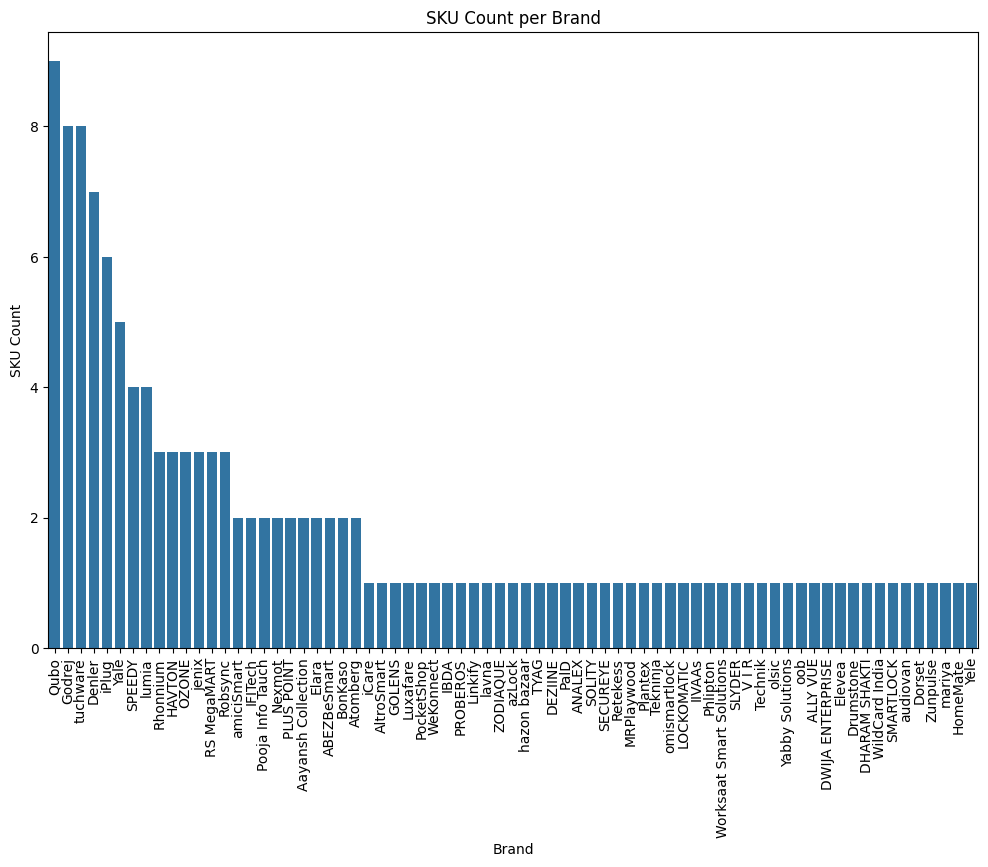

In [16]:
# Step 10: Visualization
# Bar chart for SKU count per brand
plt.figure(figsize=(12, 8))
sns.barplot(x=sku_count_per_brand.index, y=sku_count_per_brand.values)
plt.title('SKU Count per Brand')
plt.xlabel('Brand')
plt.ylabel('SKU Count')
plt.xticks(rotation=90)
plt.show()

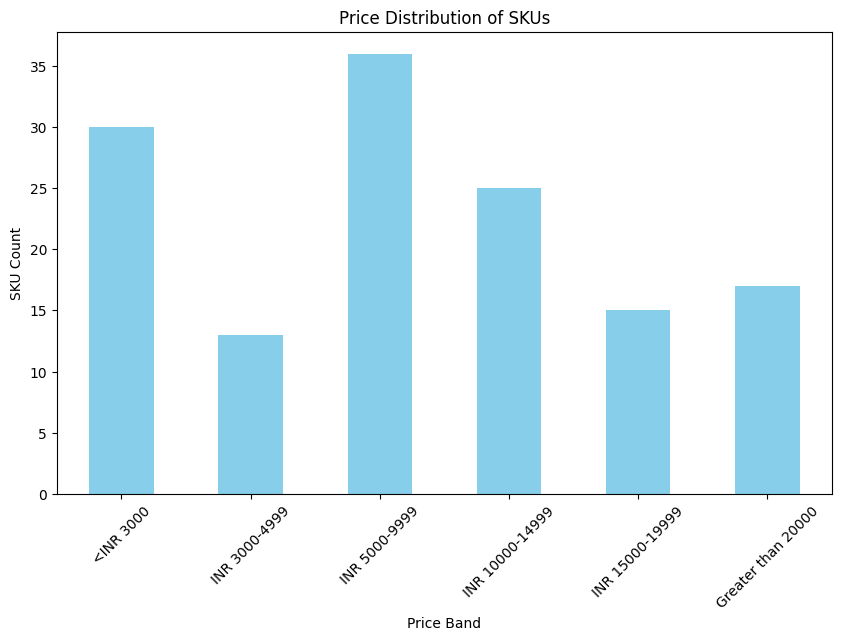

In [17]:
# Bar chart for Price Distribution
plt.figure(figsize=(10, 6))
price_distribution.plot(kind='bar', color='skyblue')
plt.title('Price Distribution of SKUs')
plt.xlabel('Price Band')
plt.ylabel('SKU Count')
plt.xticks(rotation=45)
plt.show()